# **MLP con el dataset de CIFAR**

- Problema de clasificación de imágenes con MLPs
- CIFAR es una base de datos de imágenes 10 clases
- Las imágenes vienen en tensores de 32 x 32 x 3 (canales).

utils

In [1]:
import matplotlib.pyplot as plt


def sample_batch(dataset):
    batch = dataset.take(1).get_single_element()
    if isinstance(batch, tuple):
        batch = batch[0]
    return batch.numpy()


def display(
    images, n=10, size=(20, 3), cmap="gray_r", as_type="float32", save_to=None
):
    """
    Displays n random images from each one of the supplied arrays.
    """
    if images.max() > 1.0:
        images = images / 255.0
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0

    plt.figure(figsize=size)
    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets


Parámetros

In [3]:
NUM_CLASSES = 10

## Preparación de los Datos

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 18s 0us/step


In [5]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

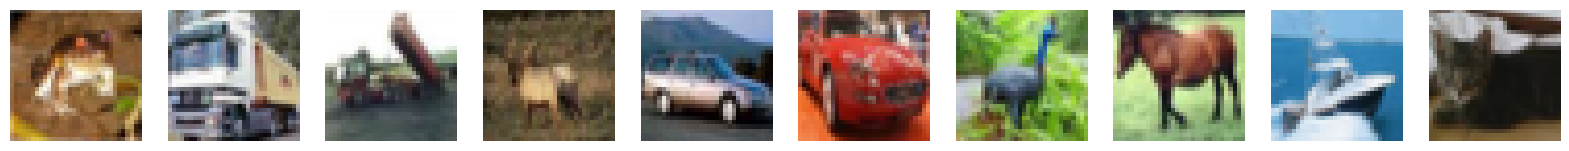

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [6]:
display(x_train[:10])
print(y_train[:10])

## Construcción del Modelo

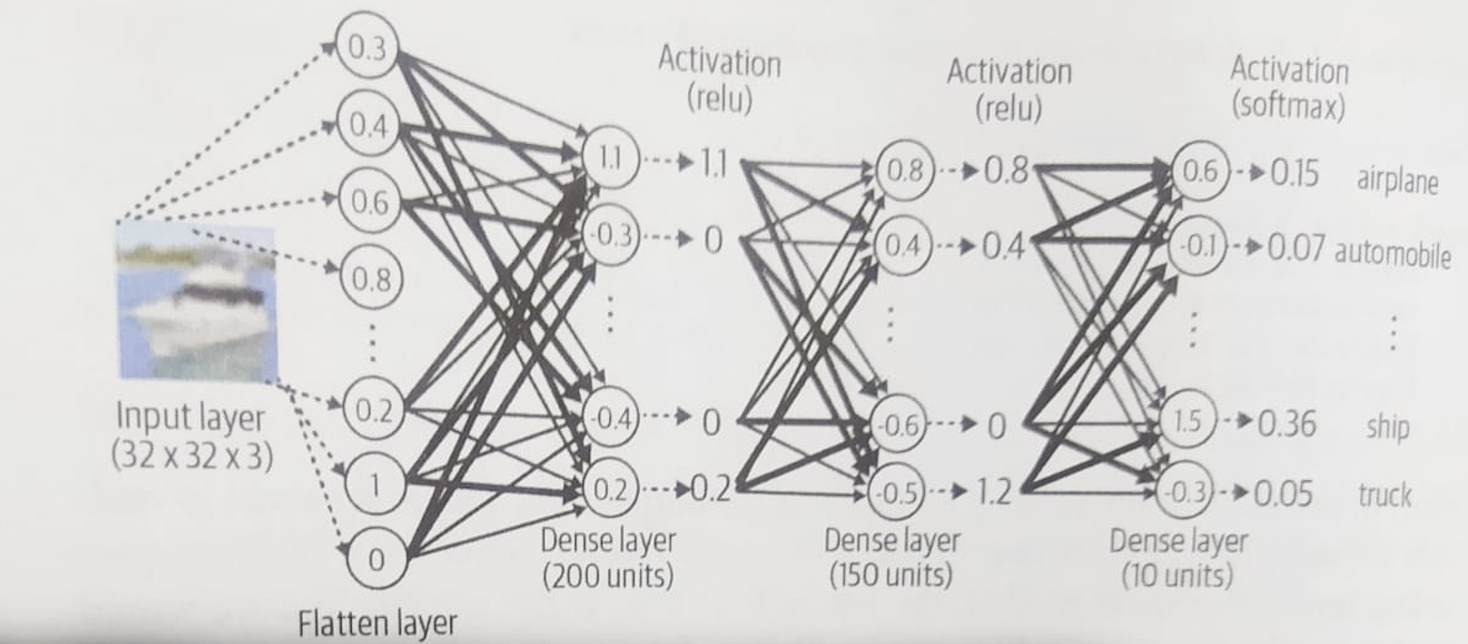

In [7]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)



**Capas**

- Input: la forma que esperamos de cada figura (32,32,3). No se especifica la dimensión del batch size (no es necesario pues es variable).
- Flatten: para transformar el tensor en un vector de 3072 neuronas de entrada (32x32x3). Es un requerimientos de las MLPs, recordar que se conectará completamente con matrices bidimensionales de pesos.
- Dense: representa el número de neuronas que se conectará completamente con la capa anterior. Basicamente contiene los pesos o parámetros de la MLP
- La primera capa densa de 200 unidades se conectará con la capa de entrada de 3072 unidades.

**Funciones de activación**

![texto del vínculo](https://miro.medium.com/max/1200/1*ZafDv3VUm60Eh10OeJu1vw.png)

**Softmax**


Normalizar las predicciones de las clases (todas los scores sumen 1)

$y_i = \frac{e^{x_i}}{\sum_{j=1}^J e^{x_j}}$

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Número de parámetros**

El número de parámetros en la capa densa de 200 unidades es;

$200*(3072+1) = 614600$

El 1 representa el término de bias que se añade a cada neurona.


## Entrenamiento del Modelo

In [9]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

**Aprendizaje**

In [10]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.8507 - accuracy: 0.3328
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6744 - accuracy: 0.4005
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5941 - accuracy: 0.4301
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5413 - accuracy: 0.4524
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5020 - accuracy: 0.4622
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4719 - accuracy: 0.4742
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4422 - accuracy: 0.4851
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4209 - accuracy: 0.4949
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3981 - accuracy: 0.5020
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.38

## Evaluación

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4702 - accuracy: 0.4795


[1.4701521396636963, 0.4794999957084656]

In [12]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 2ms/step


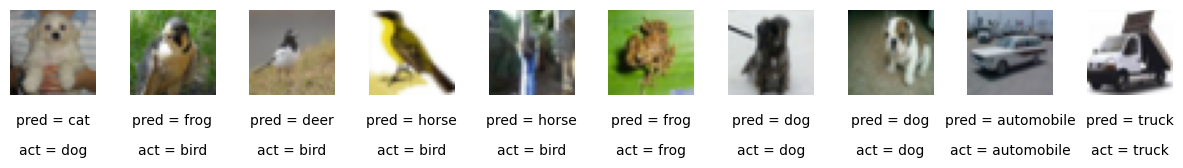

In [13]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)